# importing libraries

In [ ]:
#utilities
import re
import numpy as np
import pandas as pd

#plotting
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#nltk
from nltk.stem import WordNetLemmatizer

#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
tweet = pd.read_csv("hotstar.csv")

# summarizing the data

In [ ]:
tweet.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,17.0,NaN,NaN,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,42.0,NaN,NaN,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,129.0,NaN,NaN,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,103.0,NaN,NaN,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,44.0,NaN,NaN,movie


In [ ]:
tweet.tail()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
6354,18211,MS Dhoni - Reimagined Hindi,"MS Dhoni's career reimagined, watch streaming ...",Sport,2018,U/A 13+,NaN,1.0,1.0,tv
6355,1260063600,Sasneham,An old-age home reunites past lovers Indira an...,Drama,2021,U/A 13+,NaN,1.0,345.0,tv
6356,1260071152,Bolo Ambe Maa Ki Jai,"Narrated by Saptarishi, celebrate Navratri wit...",Mythology,2021,U/A 13+,NaN,1.0,5.0,tv
6357,1260002656,Ambi Ning Vaisaytho Specials,"Catch all the fun, gossips, and anecdotes from...",Reality,2018,G,NaN,1.0,1.0,tv
6358,1260003179,Dil Toh Happy Hai Ji,"Based in Amritsar, this is a joyful tale of fr...",Drama,2019,U/A 13+,NaN,1.0,148.0,tv


In [ ]:
print('length of data is', len(tweet))

length of data is 6359


In [ ]:
tweet.shape

(6359, 10)

In [ ]:
tweet.columns

Index(['hotstar_id', 'title', 'description', 'genre', 'year', 'age_rating',
       'running_time', 'seasons', 'episodes', 'type'],
      dtype='object')

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6359 non-null   int64  
 1   title         6359 non-null   object 
 2   description   6359 non-null   object 
 3   genre         6359 non-null   object 
 4   year          6359 non-null   int64  
 5   age_rating    6359 non-null   object 
 6   running_time  4188 non-null   float64
 7   seasons       2171 non-null   float64
 8   episodes      2171 non-null   float64
 9   type          6359 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 496.9+ KB


In [ ]:
tweet.describe()

,hotstar_id,year,running_time,seasons,episodes
count,6.359000e+03,6359.000000,4188.000000,2171.000000,2171.000000
mean,1.040192e+09,2010.908162,104.016476,2.744357,126.118839
std,4.977201e+08,12.025939,45.989765,5.065703,253.941213
min,3.000000e+00,1928.000000,1.000000,1.000000,1.000000
25%,1.000070e+09,2008.000000,87.000000,1.000000,6.000000
50%,1.000239e+09,2015.000000,119.000000,1.000000,24.000000
75%,1.260061e+09,2019.000000,136.000000,2.000000,131.500000
max,1.837059e+09,2022.000000,199.000000,73.000000,3792.000000


In [ ]:
tweet.dtypes

hotstar_id        int64
title            object
description      object
genre            object
year              int64
age_rating       object
running_time    float64
seasons         float64
episodes        float64
type             object
dtype: object

In [ ]:
tweet.dtypes.value_counts()

object     5
float64    3
int64      2
dtype: int64

In [ ]:
tweet.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time    2171
seasons         4188
episodes        4188
type               0
dtype: int64

In [ ]:
print('Count of columns in the data is:  ', len(tweet.columns))
print('Count of rows in the data is:  ', len(tweet))

Count of columns in the data is:   10
Count of rows in the data is:   6359


In [ ]:
tweet.dropna(axis=1,inplace=True)
tweet.shape

(6359, 7)

In [ ]:
tweet.head()

,hotstar_id,title,description,genre,year,age_rating,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,movie


as hotstar id is not important we can drop it


In [ ]:
tweet.drop(columns = "hotstar_id",inplace = True)

In [ ]:
tweet.head()

,title,description,genre,year,age_rating,type
0,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,U/A 13+,movie
1,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,U/A 13+,movie
2,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,U/A 13+,movie
3,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,U/A 13+,movie
4,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,movie


In [ ]:
tweet.age_rating.value_counts()

U/A 13+                  2598
U                        1062
U/A 7+                   1045
U/A 16+                   998
A                         271
PG                        252
G                          81
12+                        20
15+                         9
English                     6
Kannada                     4
Star Sports 1 Marathi       3
Hindi                       1
Tamil                       1
Star Sports 2               1
Star Vijay                  1
Star Sports Kannada 1       1
Star Suvarna                1
Marathi                     1
Star Sports 1 Telugu        1
Telugu                      1
Star Sports Hindi 1         1
Name: age_rating, dtype: int64

In [ ]:
#Renaming values for better reference
tweet['age_rating']=tweet['age_rating'].str.replace('U/A 13+','13')
tweet['age_rating']=tweet['age_rating'].str.replace('U/A 7+','7')
tweet['age_rating']=tweet['age_rating'].str.replace('U/A 16+','16')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


removing languages from age rating

In [ ]:
tweet.index

RangeIndex(start=0, stop=6359, step=1)

In [ ]:
tweet.drop(tweet.index[tweet['age_rating'] == 'English'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Kannada'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Tamil'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Telugu'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Hindi'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Marathi'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports 1 Marathi'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports Kannada 1 '],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports 1 Telugu  '],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Suvarna'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Vijay'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports 2'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports Hindi 1'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports Kannada 1'],inplace=True)
tweet.drop(tweet.index[tweet['age_rating'] == 'Star Sports 1 Telugu'],inplace=True)

In [ ]:
tweet.age_rating.value_counts()

13+    2598
U      1062
7+     1045
16+     998
A       271
PG      252
G        81
12+      20
15+       9
Name: age_rating, dtype: int64

genre column

In [ ]:
tweet['genre'].value_counts()

Drama               1806
Comedy               754
Romance              606
Action               583
Reality              377
Thriller             315
Family               247
Animation            223
Sport                208
Documentary          177
Animals & Nature     119
Kids                 104
Horror                96
Crime                 89
Talk Show             80
Mythology             76
Superhero             61
Standup Comedy        51
Adventure             44
Historical            41
Biopic                40
Science Fiction       38
Science               34
Teen                  31
Awards                27
Mystery               26
Lifestyle             26
Musical               15
Concert Film          12
Shorts                 7
Travel                 7
Docudrama              6
Food                   6
Fantasy                3
Kabaddi                1
Name: genre, dtype: int64

In [ ]:
tweet.head(10)

,title,description,genre,year,age_rating,type
0,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021,13+,movie
1,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019,13+,movie
2,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009,13+,movie
3,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006,13+,movie
4,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017,U,movie
5,The Disney Holiday Singalong,"Hosted by Ryan Seacrest, the jolly event full ...",Musical,2020,7+,movie
6,Rambha,Newlyweds Srikanth and Ramya rent a flat. The ...,Romance,2006,16+,movie
7,Pyaar Ka Saagar,"After his parents die, Bishen takes it upon hi...",Family,1961,U,movie
8,Kaada Beladingalu,"While on an assignment, journalist Sudheshene ...",Drama,2007,7+,movie
9,Ullasa Utsaha,"Preetham tries to woo Mahalakshmi, who is in l...",Romance,2010,7+,movie


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


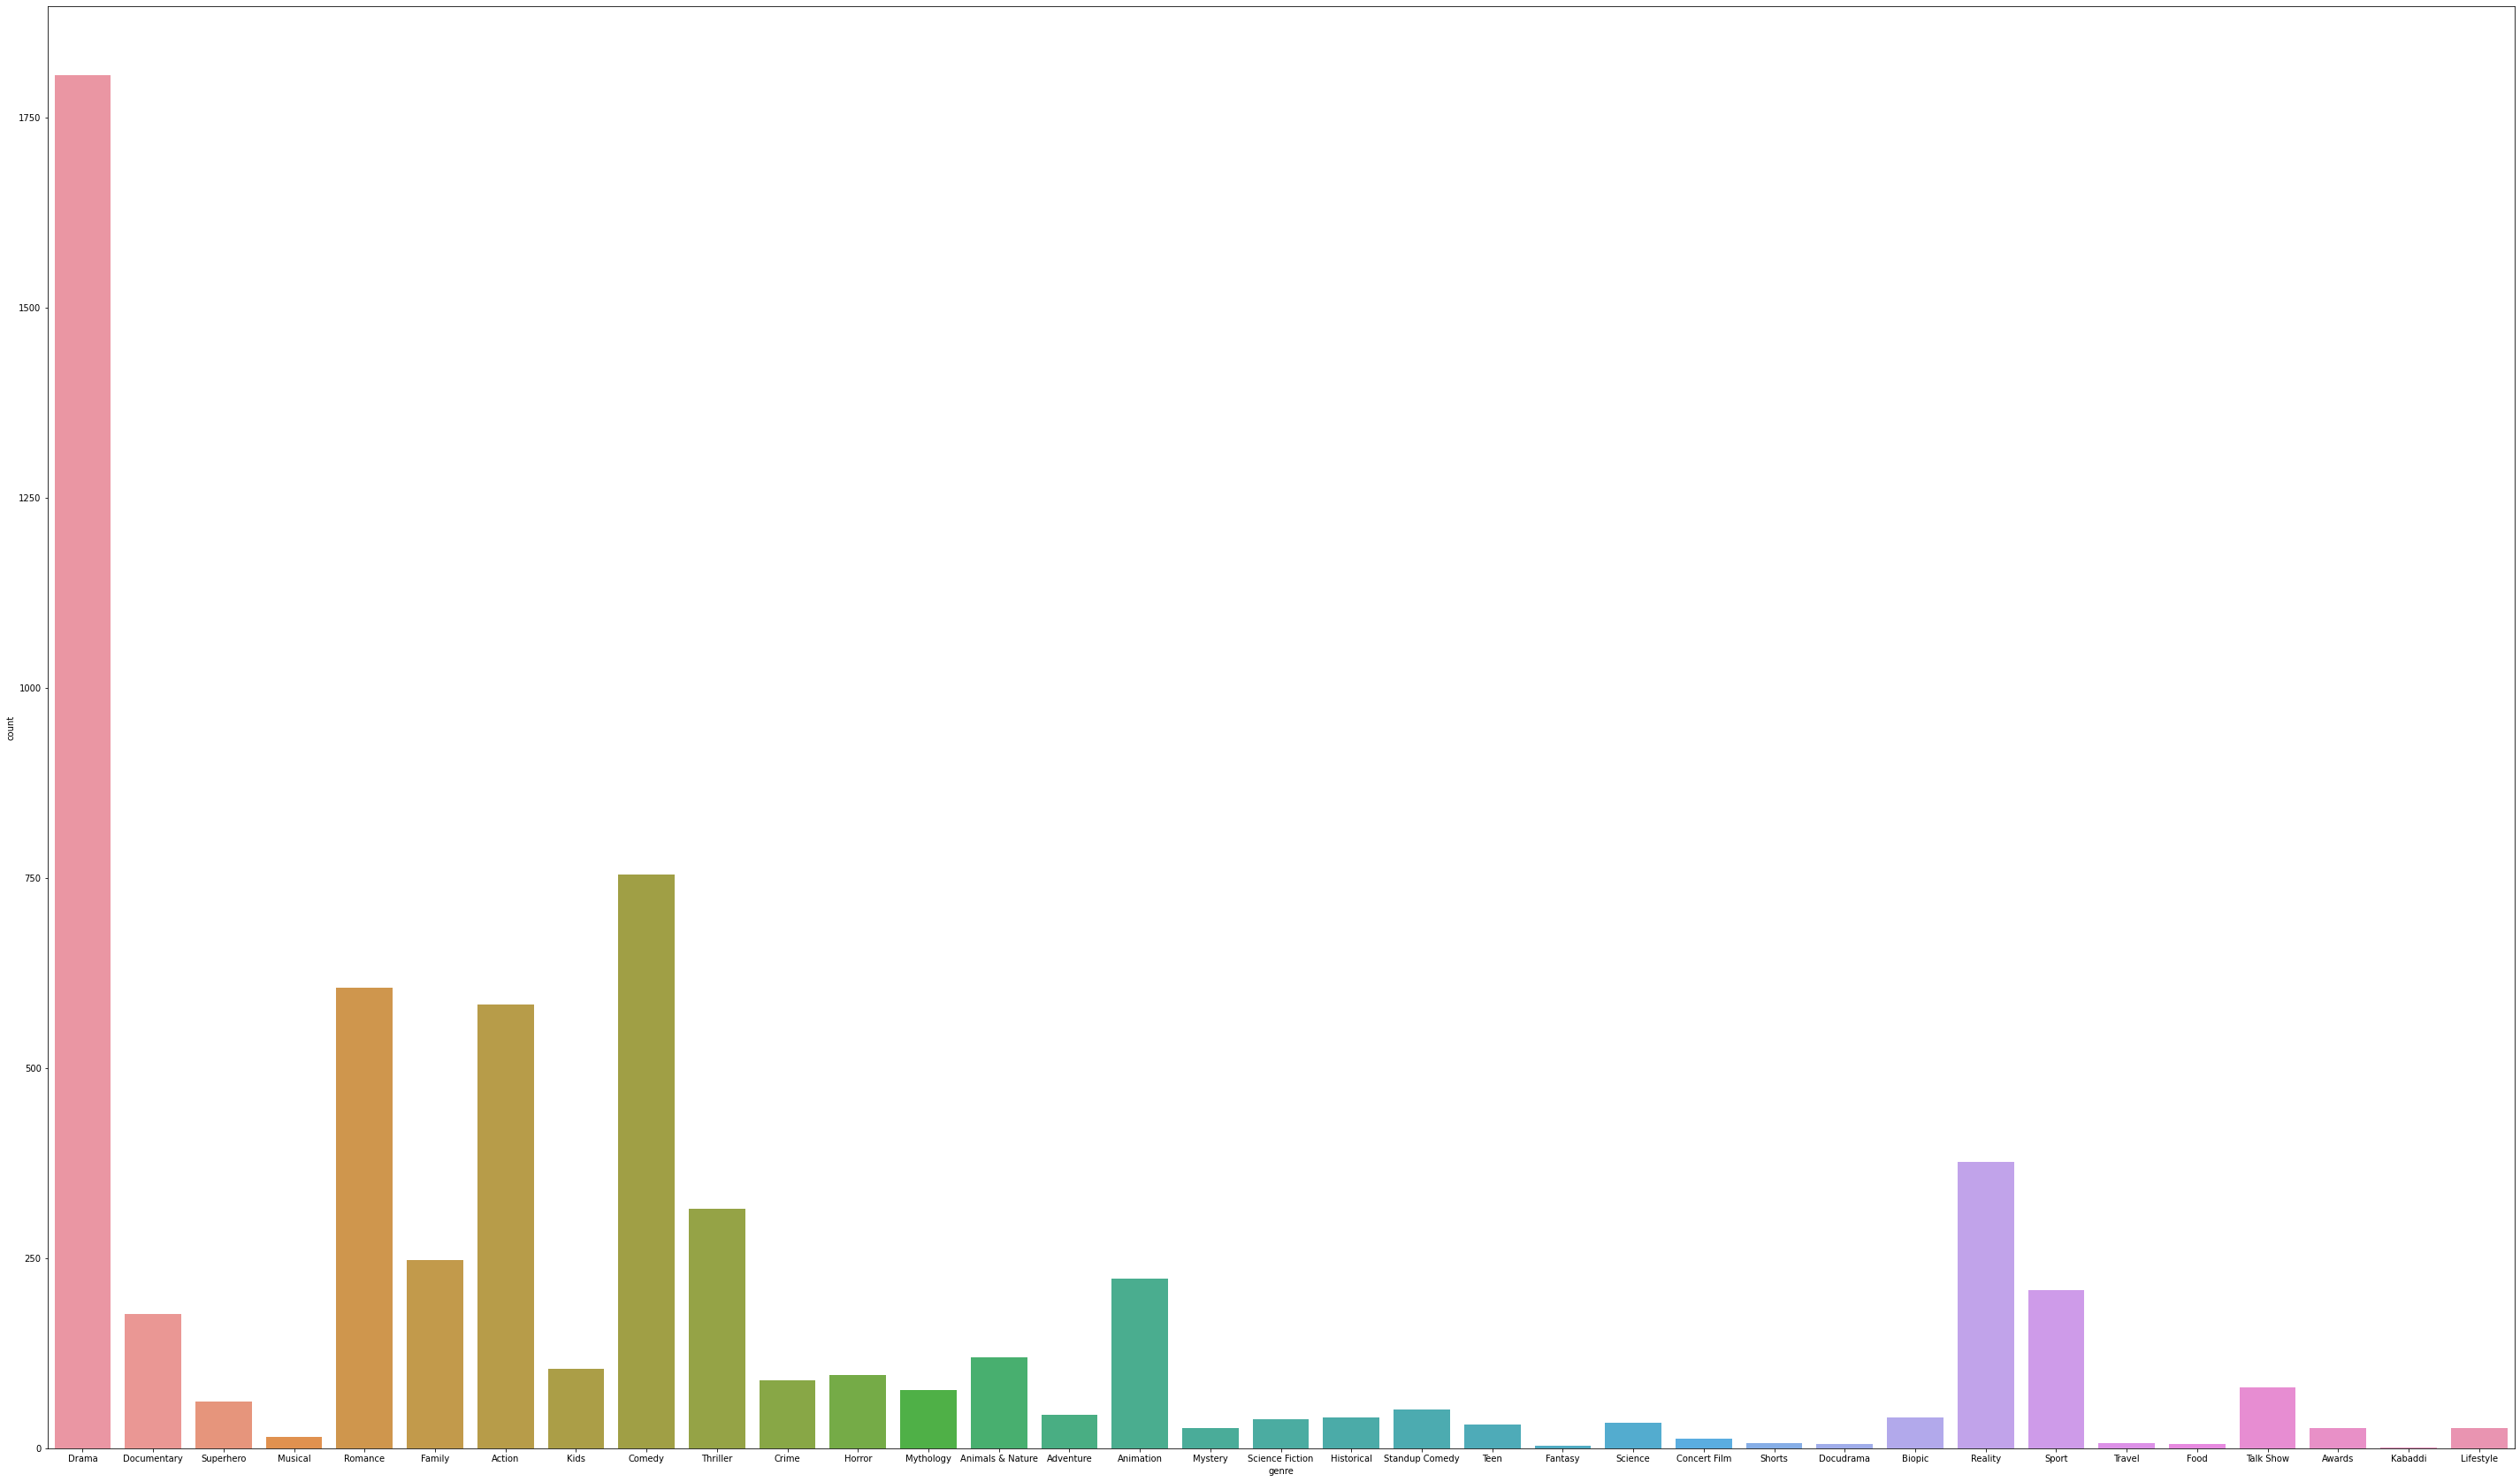

In [ ]:
plt.figure(figsize=(50,30))
sns.countplot(tweet["genre"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


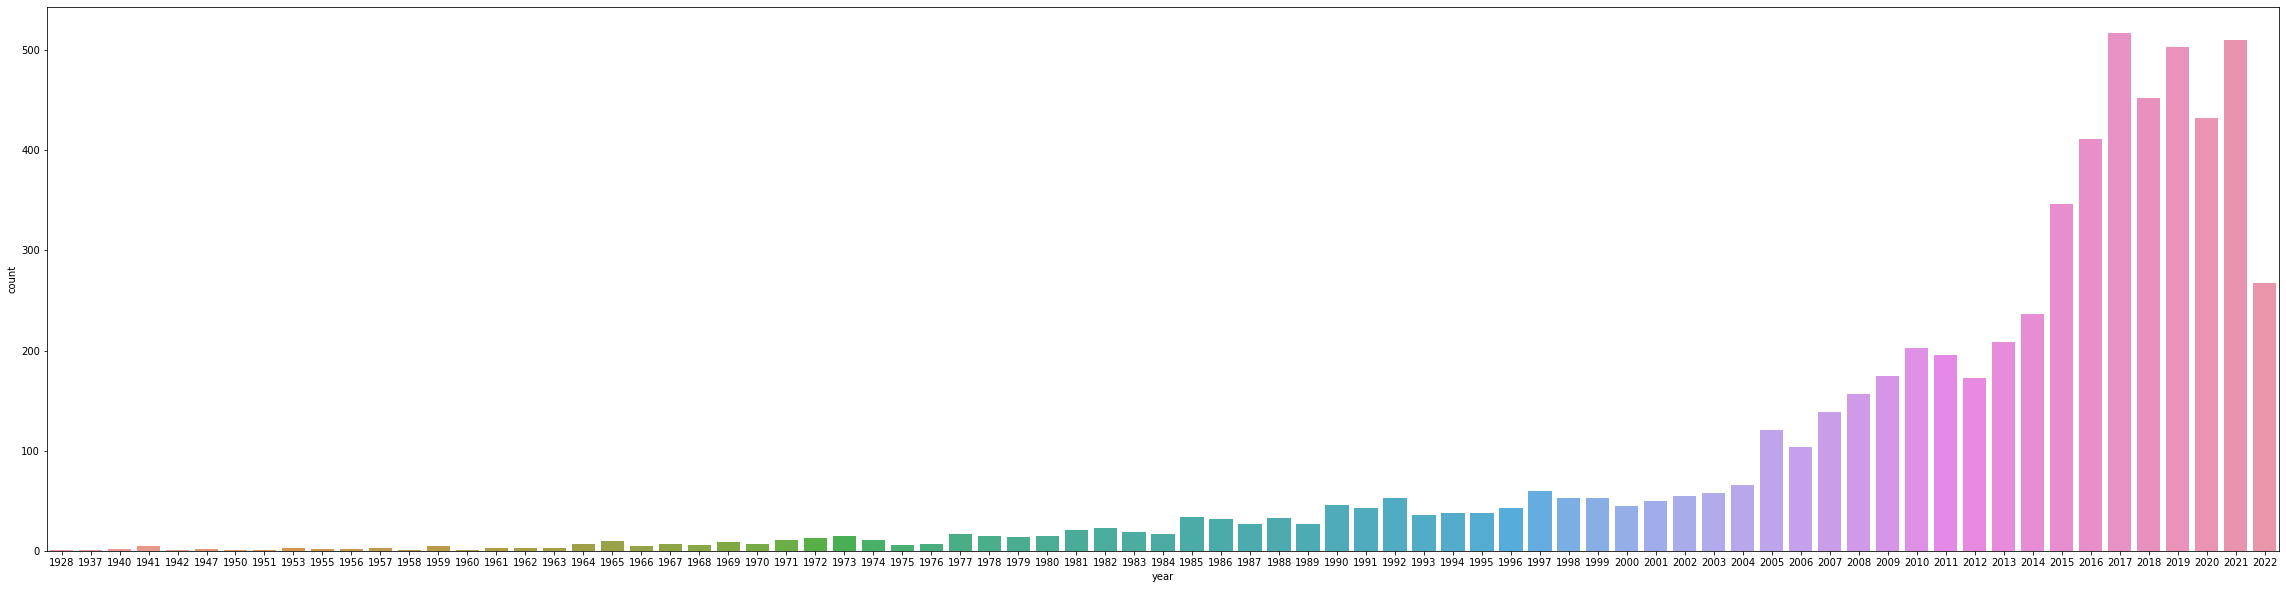

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(tweet["year"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


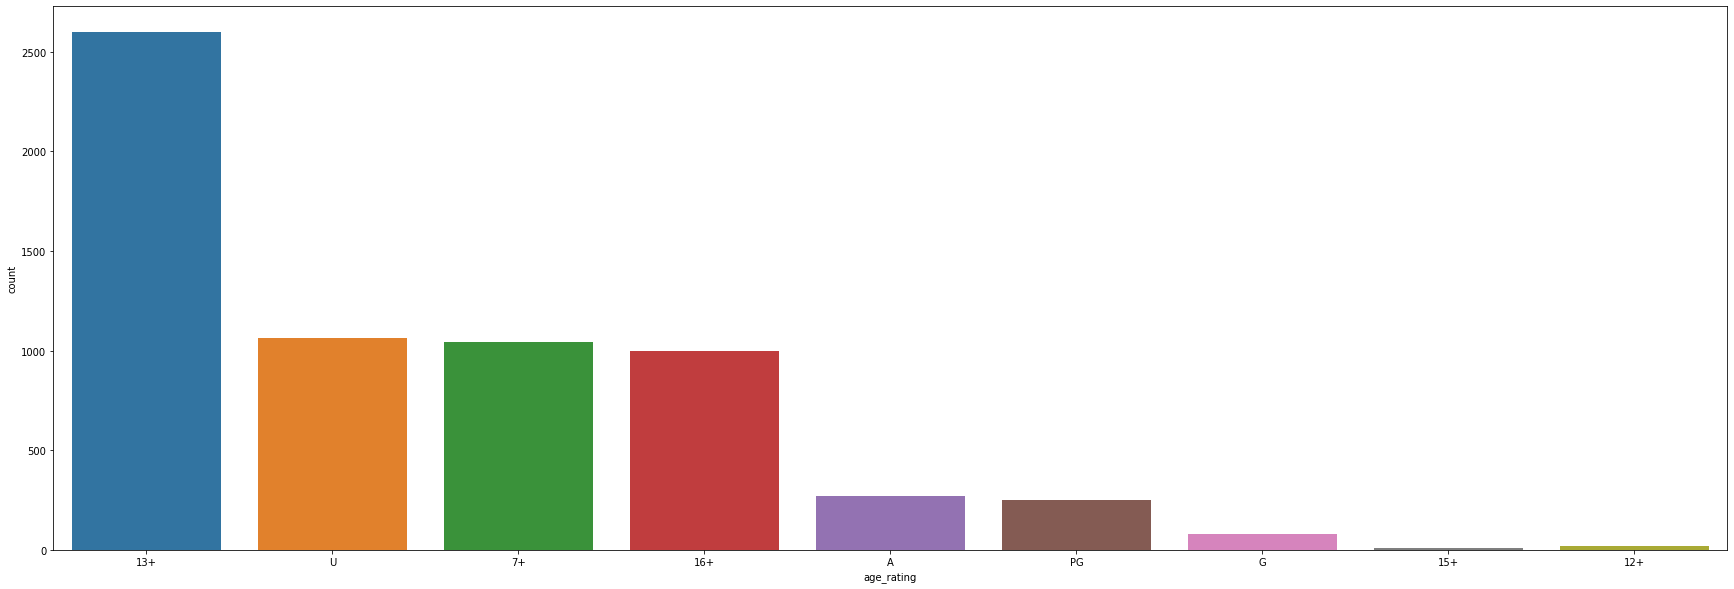

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(tweet["age_rating"])

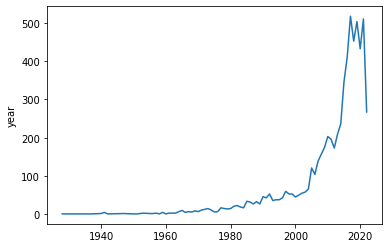

In [ ]:
data=tweet['year'].value_counts().sort_values(ascending=False)
sns.lineplot(x=data.index, y=data)

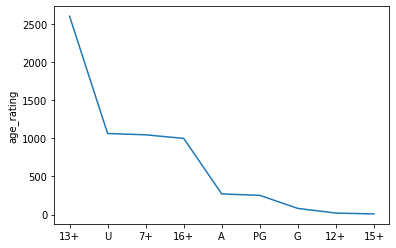

In [ ]:
data=tweet['age_rating'].value_counts().sort_values(ascending=False)
sns.lineplot(x=data.index, y=data)

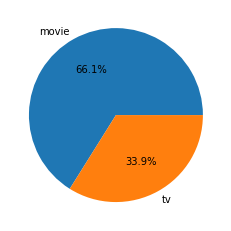

In [ ]:
#the different types
tweet['type'].value_counts()
#pie chart 
plt.pie(tweet['type'].value_counts(), labels=tweet['type'].value_counts().index, autopct='%1.1f%%');


In [ ]:
#group by year and get only values of type 'movie'
tweet_movie=tweet[tweet['type']=='movie']
tweet_series=tweet[tweet['type']=='tv']
data1=tweet_movie.groupby(tweet['year'])['type'].count()
data2=tweet_series.groupby(tweet['year'])['type'].count()
#graph for showing the yearly increase in the movies each year
# sns.lineplot(x=data.index, y=data)
#draw a histogram using data

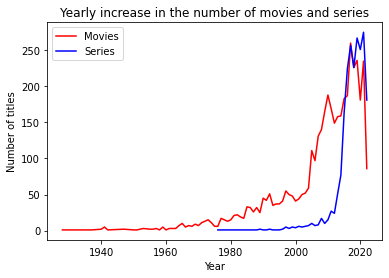

In [ ]:
#line graphs
plt.plot(data1.index, data1.values, color='red', label='Movies')
plt.plot(data2.index, data2.values, color='blue', label='Series')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.title('Yearly increase in the number of movies and series')
plt.show()

In [ ]:
pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

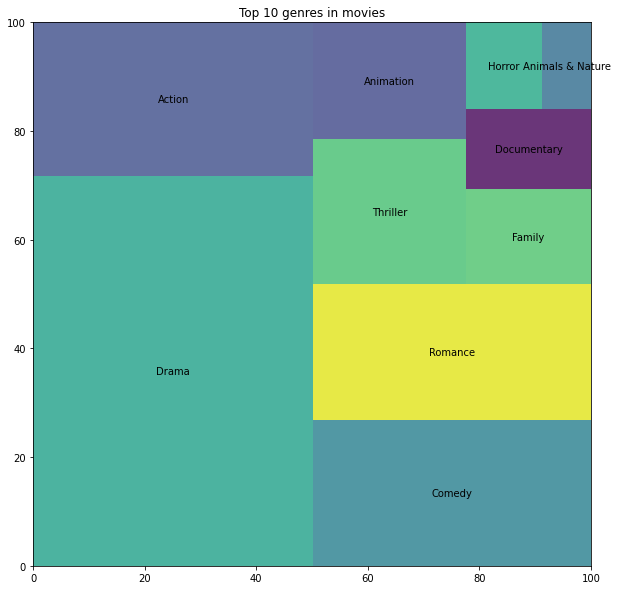

In [ ]:
#top 10 genres in movies
data=tweet_movie['genre'].value_counts().sort_values(ascending=False)[:10]
#draw treemap
plt.figure(figsize=(10,10))
plt.title('Top 10 genres in movies')
squarify.plot(data,label=data.index, alpha=.8 )
plt.show()

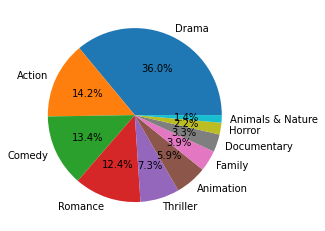

In [ ]:
#draw a pie chart for the top 10 genres in movies
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.show()

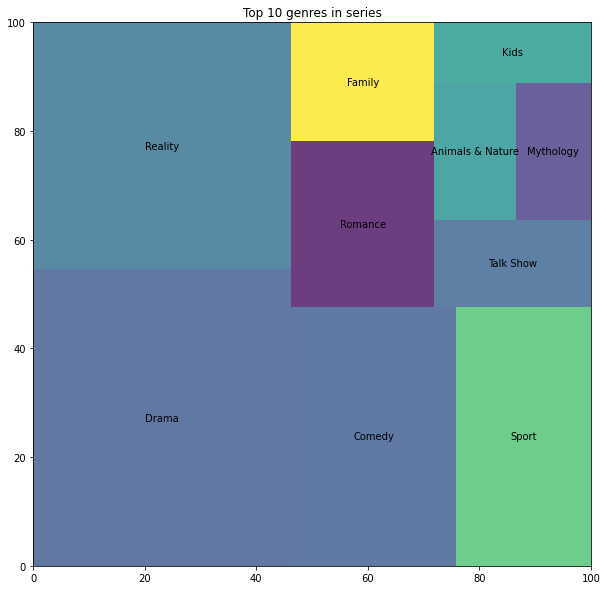

In [ ]:
#top 10 genres in series
data=tweet_series['genre'].value_counts().sort_values(ascending=False)[:10]
#draw treemap
plt.figure(figsize=(10,10))
plt.title('Top 10 genres in series')
squarify.plot(data,label=data.index, alpha=.8 )
plt.show()

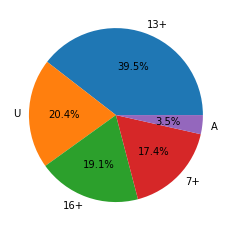

In [ ]:
#age rating of movies and tv
data=tweet_movie['age_rating'].value_counts().sort_values(ascending=False)[:10]
#draw pie chart
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.show()

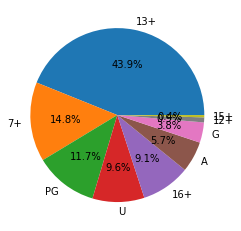

In [ ]:
#age rating of tv
data=tweet_series['age_rating'].value_counts().sort_values(ascending=False)[:10]
#draw pie chart
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.show()

Word cloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

In [ ]:
print(stopwords)

{"they'd", 'http', 'myself', 'www', 'yourselves', 'were', 'being', 'shall', 'so', 'i', "when's", "isn't", 'hence', 'very', 'between', 'be', 'when', 'that', 'too', 'what', 'why', 'some', 'r', 'its', "we've", 'all', 'own', 'otherwise', "it's", 'below', 'did', "i've", 'who', 'itself', 'other', "she's", 'his', 'have', "shan't", 'me', "that's", 'by', 'whom', "we're", "you're", 'or', 'doing', 'having', "haven't", 'am', 'like', "why's", "hadn't", 'during', "where's", "here's", "won't", 'yours', "aren't", 'here', 'further', 'which', 'any', 'since', "they've", 'my', "she'd", 'are', 'into', "they'll", 'at', 'does', 'on', 'also', "how's", 'few', 'could', 'herself', 'not', 'but', 'k', 'he', 'him', "hasn't", "i'd", "they're", 'can', 'with', 'just', "he's", "you've", 'has', 'we', "he'd", 'to', 'theirs', "can't", "let's", 'get', 'the', 'out', 'however', 'those', "you'll", 'their', "don't", 'else', 'nor', 'over', 'both', 'do', 'from', 'cannot', 'would', 'as', 'once', 'our', 'off', "doesn't", "shouldn'

In [ ]:
from PIL import Image
import urllib #URL handling module for python
import requests #requests module allows you to send HTTP requests using Python

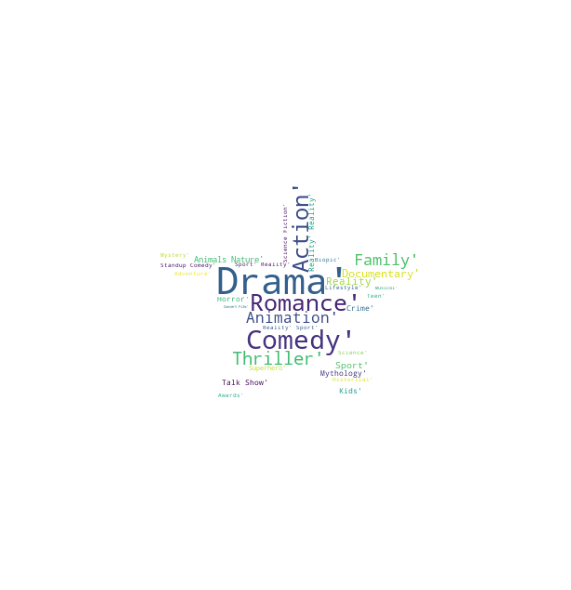

In [ ]:
text = str(tweet.genre.tolist()) ##returns list of words/values
mask = np.array(Image.open(requests.get('https://image.shutterstock.com/image-vector/star-vector-icon-600w-660000226.jpg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

# References
https://www.kaggle.com/code/yoohtony/genre-analysis

https://icon-library.com/images/movie-icon-images/movie-icon-images-28.jpg

https://www.holisticseo.digital/python-seo/word-cloud/

https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://image.shutterstock.com/image-vector/star-vector-icon-600w-660000226.jpg
